In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings; warnings.simplefilter('ignore')

In [2]:
movies_sorted = pd.read_csv('/home/saddie/Documents/CIS5570/movie_dataset/movies_metadata_sorted_id.csv')
movies_sorted = movies_sorted.set_index('movie_id')
movies_sorted_cols = movies_sorted.columns
print(movies_sorted_cols)
print(movies_sorted.dtypes)
movies_sorted.head(2)



Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
adult                       bool
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline  

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
movie_id,,,,,,,,,,,,,,,,,,,,,
2,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,3.860491,...,1988-10-21,0.0,69.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",Released,NaN,Ariel,False,7.1,44.0
3,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",2.292110,...,1986-10-16,0.0,76.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Shadows in Paradise,False,7.1,35.0


In [3]:
movie_votes = movies_sorted[['vote_average', 'vote_count']]
print(movie_votes.shape)
movie_votes.head()

(45433, 2)


,vote_average,vote_count
movie_id,,
2,7.1,44.0
3,7.1,35.0
5,6.5,539.0
6,6.4,79.0
11,8.1,6778.0


In [4]:
print(movie_votes[movie_votes['vote_count'].isna()].index)
print(movie_votes[movie_votes['vote_average'].isna()].index)
print(movie_votes.shape)
# consistent
movie_votes = movie_votes.drop(index = movie_votes[movie_votes['vote_average'].isna()].index)


Int64Index([82663, 122662, 249260], dtype='int64', name='movie_id')
Int64Index([82663, 122662, 249260], dtype='int64', name='movie_id')
(45433, 2)


In [5]:
print(movie_votes.shape)

(45430, 2)


In [6]:
movie_votes_zero_index = movie_votes[movie_votes['vote_average']==0].index
movie_count_zero_index = movie_votes[movie_votes['vote_count']==0].index
print(movie_votes_zero_index)
print(movie_count_zero_index)
movie_votes = movie_votes.drop(index =movie_count_zero_index)

Int64Index([  1488,   1849,   2033,   2192,   2397,   3024,   3081,   3118,
              3576,   3966,
            ...
            461089, 461257, 461533, 462026, 462788, 464819, 465044, 467731,
            468343, 469172],
           dtype='int64', name='movie_id', length=2995)
Int64Index([  1488,   1849,   2033,   2192,   2397,   3024,   3118,   3576,
              3966,   4419,
            ...
            461089, 461257, 461533, 462026, 462788, 464819, 465044, 467731,
            468343, 469172],
           dtype='int64', name='movie_id', length=2896)


In [7]:
print(movie_votes.shape)

movie_votes_zero = np.delete(movie_votes_zero_index.values, movie_count_zero_index.values)
movie_votes_zero

(42534, 2)


array([  1488,   1849,   2033, ..., 467731, 468343, 469172])

In [8]:
movies_sorted.loc[movie_votes_zero]

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
movie_id,,,,,,,,,,,,,,,,,,,,,
1488,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,tt0461804,zh,綠草地,Bilike has never seen a ping-pong ball before....,0.221652,...,2005-06-11,0.0,102.0,"[{'iso_639_1': 'mn', 'name': ''}]",Released,NaN,Mongolian Ping Pong,False,0.0,0.0
1849,False,NaN,0,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",NaN,tt0057362,en,Nine Hours to Rama,José Ferrer and Horst Buchholz star in this fi...,0.567990,...,1963-04-30,0.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The murder that changed the lives of millions!,Nine Hours to Rama,False,0.0,0.0
2033,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0116635,en,Infinity,Story of the early life of genius and Nobel Pr...,1.226688,...,1996-10-04,0.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Infinity,False,0.0,0.0
2192,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,tt0128447,it,"Sandok, il Maciste della giungla",Temple of the White Elephant,0.118964,...,1964-03-28,0.0,85.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Temple of the White Elephant,False,0.0,0.0
2397,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",NaN,tt0150500,en,Fallout,No overview found.,1.687428,...,1998-01-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Fallout,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464819,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0365473,en,The Making of 'The Terminator': A Retrospective,An interview session with Arnold Schwarzenegge...,0.000001,...,1992-01-01,0.0,18.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Making of 'The Terminator': A Retrospective,False,0.0,0.0
465044,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt5943940,en,Abduction,A horror comedy spoofing conspiracy theory mov...,0.281008,...,2017-06-28,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Horrifically Funny,Abduction,False,0.0,0.0
467731,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0507700,en,Tragedy in a Temporary Town,Fifteen-year-old girl Dotty Fisher is assaulte...,0.001189,...,1956-02-19,0.0,60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Tragedy in a Temporary Town,False,0.0,0.0


In [9]:
#movie_votes = movie_votes.drop(index =movie_votes_zero)

In [10]:
print(movie_votes.shape)

(42534, 2)


In [11]:
from scipy import stats

In [12]:
movie_votes_desc = stats.describe(movie_votes)

In [13]:
print(movie_votes_desc)

DescribeResult(nobs=42534, minmax=(array([0., 1.]), array([1.0000e+01, 1.4075e+04])), mean=array([  6.00086284, 117.42116895]), variance=array([1.65881030e+00, 2.57106212e+05]), skewness=array([-0.67423393, 10.11643523]), kurtosis=array([  1.87126105, 141.65544875]))


In [14]:
votes_avg_mean = movie_votes_desc.mean[0]
votes_count_mean = movie_votes_desc.mean[1]
print(votes_avg_mean)

6.000862839140451


In [15]:
import matplotlib.pyplot as plt

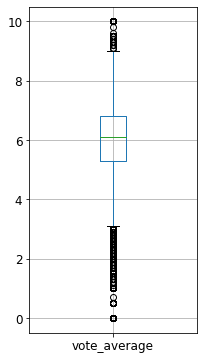

In [16]:
vote_avg_plot= movie_votes.boxplot(column = ['vote_average'],
                                    figsize=(3,6),
                                    fontsize = 12
                                   )

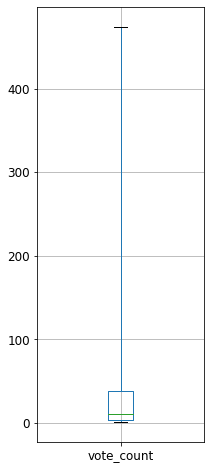

In [17]:
vote_count_plot= movie_votes.boxplot(column = ['vote_count'],
                                    figsize=(3,8),
                                    fontsize = 12,
                                    whis =[5,95],
                                     sym="",
                                     manage_ticks=True
                                   )

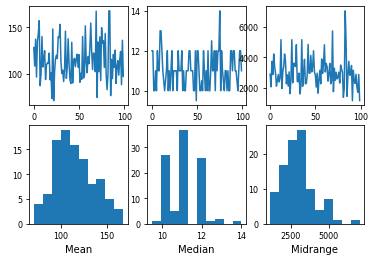

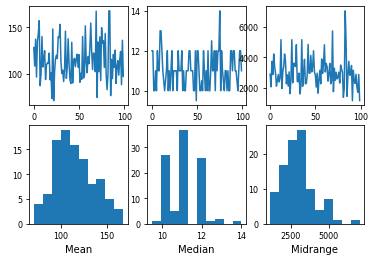

In [18]:
pd.plotting.bootstrap_plot(movie_votes['vote_count'],size=500, samples=100)
# fig=None, size=5000, samples=100

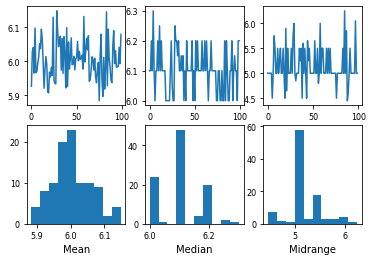

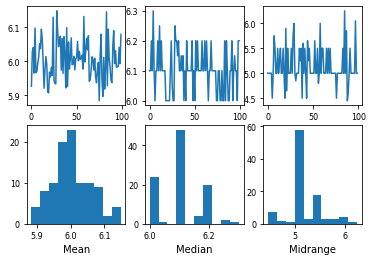

In [19]:
pd.plotting.bootstrap_plot(movie_votes['vote_average'],size=500, samples=100)
# fig=None, size=50, samples=500

(array([3.7627e+04, 1.7380e+03, 8.4800e+02, 4.6200e+02, 3.1300e+02,
        2.1600e+02, 1.9500e+02, 1.4200e+02, 1.0200e+02, 9.2000e+01,
        9.1000e+01, 8.0000e+01, 5.8000e+01, 4.7000e+01, 4.7000e+01,
        3.0000e+01, 4.2000e+01, 3.3000e+01, 2.8000e+01, 2.1000e+01,
        1.9000e+01, 2.9000e+01, 2.6000e+01, 1.3000e+01, 1.9000e+01,
        9.0000e+00, 7.0000e+00, 1.6000e+01, 1.1000e+01, 1.3000e+01,
        7.0000e+00, 9.0000e+00, 1.6000e+01, 1.3000e+01, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 3.0000e+00, 6.0000e+00, 6.0000e+00,
        7.0000e+00, 6.0000e+00, 8.0000e+00, 4.0000e+00, 5.0000e+00,
        2.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.00

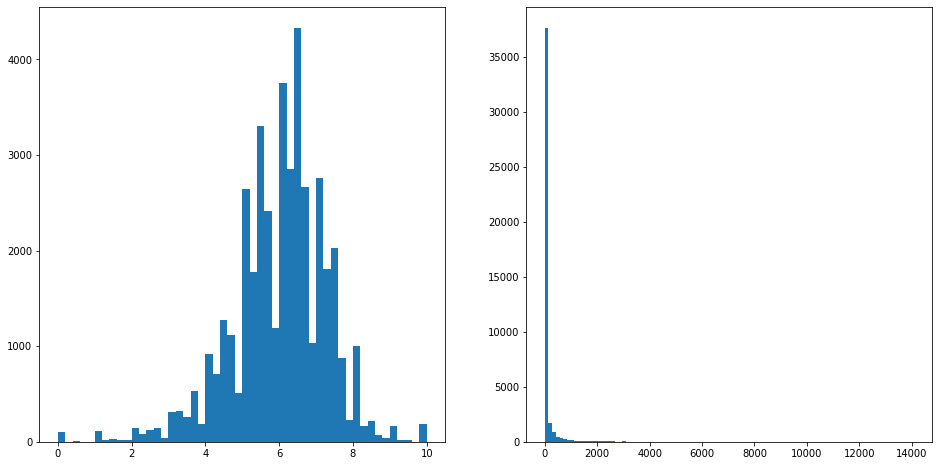

In [20]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(movie_votes['vote_average'], bins=50)
ax[1].hist(movie_votes['vote_count'], bins=100)


In [21]:
vote_count_95high = movie_votes['vote_count'].quantile(0.95)
print(vote_count_95high)

474.0


In [22]:
movies_sorted = movies_sorted.loc[movie_votes.index]
movies_sorted.shape

(42534, 23)

In [23]:
movies_sorted['vote_count'] = movies_sorted['vote_count'].astype('int')
movies_sorted['vote_average'] = movies_sorted['vote_average'].astype('int')

In [24]:
pop_movies = movies_sorted.loc[movie_votes['vote_count'] >= vote_count_95high]
pop_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
movie_id,,,,,,,,,,,,,,,,,,,,,
5,False,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,9.026586,...,1995-12-09,4300000.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,6,539
11,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,42.149697,...,1977-05-25,775398007.0,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,False,8,6778
12,False,"{'id': 137697, 'name': 'Finding Nemo Collectio...",94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://movies.disney.com/finding-nemo,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",25.497794,...,2003-05-30,940335536.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There are 3.7 trillion fish in the ocean. They...,Finding Nemo,False,7,6292
13,False,NaN,55000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0109830,en,Forrest Gump,A man with a low IQ has accomplished great thi...,48.307194,...,1994-07-06,677945399.0,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The world will never be the same, once you've ...",Forrest Gump,False,8,8147
14,False,NaN,15000000,"[{'id': 18, 'name': 'Drama'}]",http://www.dreamworks.com/ab/,tt0169547,en,American Beauty,"Lester Burnham, a depressed suburban father in...",20.726578,...,1999-09-15,356296601.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Look closer.,American Beauty,False,7,3438


In [25]:
pop_movies.shape

(2129, 23)

In [26]:
save_path = '/home/saddie/Documents/CIS5570/movie_dataset/movies_metadata_pop_movies.csv'
pop_movies.to_csv(save_path, sep=',', index_label = 'movie_id')